# Evaluate Classification

## Setup

#### Load the API key and libaries.

In [1]:
from src.Language_Evaluation_LC import llm_language_evaluation
from src.data_analysis import run_analysis
import pandas as pd

#### Load the Constants

In [2]:
PATH = 'data/full_dataset_translated.csv'
MODEL = "meta-llama/Llama-3-70b-chat-hf"
TEMPERATURE = 0.0
N_REPETITIONS = 0
REASONING = False
LANGUAGES = ['chinese', 'japanese', 'korean']

#### Run The Experiments:

In [3]:
# Run evaluation:
llm_language_evaluation(path=PATH, model=MODEL, temperature=TEMPERATURE, n_repetitions=N_REPETITIONS, reasoning=REASONING, languages=LANGUAGES)

N_REPETITIONS should be a positive integer, not 0
N_REPETITIONS will be set to 1
**************************************************
Question 1: 
Language: chinese
Question: 
在哪个眼部区域生理上可以找到杯状细胞？
a) 角膜。
b) 角膜巩膜缘。
c) 灰线。
d) 半月襞。
Test #0: 
response
```json
{
	"response": c
}
```
Note: 杯状细胞 (goblet cells) are found in the conjunctiva, specifically in the gray line (灰线) area.
{'response': 'c'}
Language: japanese
Question: 
カリシフォルム細胞は生理的にどの眼部に存在しますか？
a) 角膜。
b) 角膜強膜辺縁。
c) グレーライン。
d) 半月襞。
Test #0: 
response
```json
{
	"response": b
}
```
(Note: The correct answer is b) 角膜強膜辺縁, which refers to the limbus, the border between the cornea and sclera.)
{'response': 'b'}
Language: korean
Question: 
어느 눈 부위에서 goblet 세포가 생리적으로 발견됩니까?
a) 각막.
b) 각막경계.
c) 회색선.
d) 반월상 접힘.
Test #0: 
response
```json
{
	"response": b
}
```
(Note: The correct answer is b) 각막경계. Goblet cells are physiologically found in the conjunctiva, which is the mucous membrane covering the white part of the eye and the inside of the eyelid

#### See the results

In [4]:
import os
MODEL = os.path.basename(MODEL)

if N_REPETITIONS > 1:
    df = pd.read_csv(f"responses/{MODEL}_Temperature{str(TEMPERATURE).replace('.', '_')}_{N_REPETITIONS}Repetitions.csv")
else:
    df = pd.read_csv(f"responses/{MODEL}_Temperature{str(TEMPERATURE).replace('.', '_')}.csv")

df

,ID,year,test,theme,subtheme,portuguese,spanish,english,tagalog,answer,chinese,japanese,korean,responses_chinese,responses_chinese_0,responses_japanese,responses_japanese_0,responses_korean,responses_korean_0
0,1,2022,Teórica I,Anatomia,cornea,Em qual região ocular células caliciformes são...,¿En qué región ocular se encuentran fisiológic...,In which ocular region are caliciform cells ph...,Aling bahagi ng mata ay kung saan matatagpuan ...,D,在哪个眼部区域生理上可以找到杯状细胞？\na) 角膜。\nb) 角膜巩膜缘。\nc) 灰线。...,カリシフォルム細胞は生理的にどの眼部に存在しますか？\na) 角膜。\nb) 角膜強膜辺縁。...,어느 눈 부위에서 goblet 세포가 생리적으로 발견됩니까?\na) 각막.\nb) ...,c,c,b,b,b,b
1,2,2022,Teórica I,Anatomia,retina,Assinale a alternativa que melhor correlaciona...,Marque la alternativa que mejor correlaciona l...,Mark the alternative that best correlates the ...,Ipagpares ang bahagi ng retina sa Hanay B sa t...,B,将以下选项与相应的眼部组织的组织学特征进行匹配：\n\nI. 由连接复合体紧密连接在一起的单...,以下の選択肢の中から、組織学的特徴とそれに対応する眼の組織を最もよく関連付けるものを選びなさ...,조직학적 특성과 해당 안구 조직을 가장 잘 연관시키는 선택지를 표시하시오:\n\nI...,a,a,a,a,a,a
2,3,2022,Teórica I,Anatomia,cornea,Ordene as três denominações celulares encontra...,Ordene los tres nombres de células que se encu...,Order the three cell names found in the cornea...,Ipagsunud-sunod ang mga cells ng corneal epith...,A,将角膜上皮中发现的三种细胞名称按顺序排列，从最表层的开始，然后是中间层，最后是深层。\na)...,角膜上皮に見られる3つの細胞名を、最も表面的なものから始めて、中間のもの、深いものの順に並べ...,"각막 상피에서 발견되는 세 가지 세포 이름을 가장 표면적인 것부터 시작하여 중간, ...",a,a,a,a,c,c
3,4,2022,Teórica I,Anatomia,cornea,"Sobre a membrana de Descemet da córnea, é corr...",Con respecto a la membrana de la córnea de Des...,"Regarding Descemet's membrane of the cornea, i...",Tama tungkol sa Descemet's membrane ng cornea:...,C,关于角膜的Descemet膜，以下说法正确的是：\na) 内皮细胞不参与其形成。\nb) 成...,角膜のデスメ膜について、以下の記述が正しいと言えます：\na) 内皮細胞はその形成に関与して...,각막의 데스메막에 관하여 다음과 같이 말할 수 있습니다:\na) 내피세포는 그 형성...,c,c,b,b,b,b
4,5,2022,Teórica I,Anatomia,cornea,"Sobre a camada lipídica do filme lacrimal, ass...",Respecto a la capa lipídica de la película lag...,"About the lipidic layer of the lacrimal film, ...",Piliin ang tamang sagot tungkol sa lipid layer...,B,关于泪膜的脂质层，请选择正确的答案。\na) 其目的是稳定由睑板腺和Manz腺分泌的泪膜。\...,涙膜の脂質層について、正しい答えを選んでください。\na) その目的は、マイボーム腺とマンツ...,눈물막의 지질층에 대해 올바른 답을 선택하십시오.\na) 그 목적은 마이봄샘과 만즈...,b,b,b,b,b,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,161,2022,Teórica II,Cristalino/Catarata,NaN,Após bloqueio retrobulbar para realização de c...,Tras el bloqueo retrobulbar para realizar la c...,After retrobulbar block for phacoemulsificatio...,Matapos ang retrobulbar block para sa phacoemu...,C,在白内障超声乳化手术中进行眼眶后阻滞后，患者在麻醉注射后五分钟内出现意识逐渐丧失、癫痫发作和...,白内障乳化手術のための後眼窩ブロック後、患者は麻酔注射後5分で意識の進行性喪失、発作、呼吸停...,"백내장 초음파 파쇄술을 위한 후안구 봉쇄 후, 환자는 마취 주사 후 5분 만에 의식...",d,d,b,b,b,b
160,162,2022,Teórica II,Cristalino/Catarata,NaN,Sobre a biometria em olhos tamponados por óleo...,Respecto a la biometría en ojos tamponados con...,Regarding biometrics in eyes covered with sili...,Alin sa mga sumusunod na pahayag patungkol sa ...,D,关于用硅油覆盖的眼睛的生物测量学，可以正确地说：\na) 通过超声测量的轴向长度与实际值相比...,シリコンオイルで覆われた目の生体計測に関して、以下の記述が正しいと言えます：\na) 超音波...,실리콘 오일로 덮인 눈의 생체 인식에 관하여 다음과 같이 말할 수 있습니다:\na)...,d,d,a,a,a,a
161,163,2022,Teórica II,Cristalino/Catarata,NaN,"Assinale a alternativa que contém, respectivam...","Seleccionar la alternativa que contenga, respe...","Check the alternative that contains, respectiv...",Alin sa mga sumusunod na tambalan patungkol sa...,A,检查包含围手术期发生松弛性虹膜综合症的药物以及在这些情况下恢复散瞳的适当干预措施的选项。\n...,選択肢の中で、術中に弛緩性虹彩症候群の発生に関連する薬剤と、これらの場合に散瞳を回復する適切...,수술 기간 동안 편평 홍채 증후군의 발생과 관련된 약물과 이러한 경우 동공 확대를 ...,d,d,d,d,d,d
162,164,2022,Teórica II,Cristalino/Catarata,NaN,Sobre a prevenção de endoftalmite em cirurgia ...,En cuanto a la prevención de endoftalmitis en ...,Regarding the prevention of endophthalmitis in...,Alin sa mga sumusunod na pamamaraan upang mapi...,B,关于白内障手术中预防眼内炎的措施，请选择正确的选项。\na) 如果对碘伏有禁忌症，应在手术前...,白内障手術における眼内炎の予防について、正しい選択肢をマークしてください。\na) ポビドン...,백내장 수술에서 안내염 예방과 관련하여 올바른 대안을 표시하십시오.\na) 포비돈 ...,b,b,b,b,b,b


### Data Analysis

n_repetitions should be a positive integer, not 0
n_repetitions will be set to 1


/Users/davidrestrepo/LLMs Bias/Language/src/data_analysis.py:215: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(languages, fontsize=16)


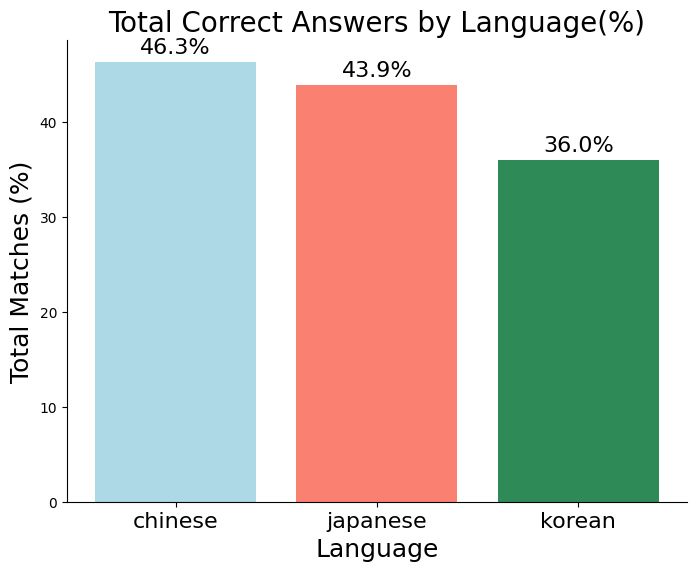

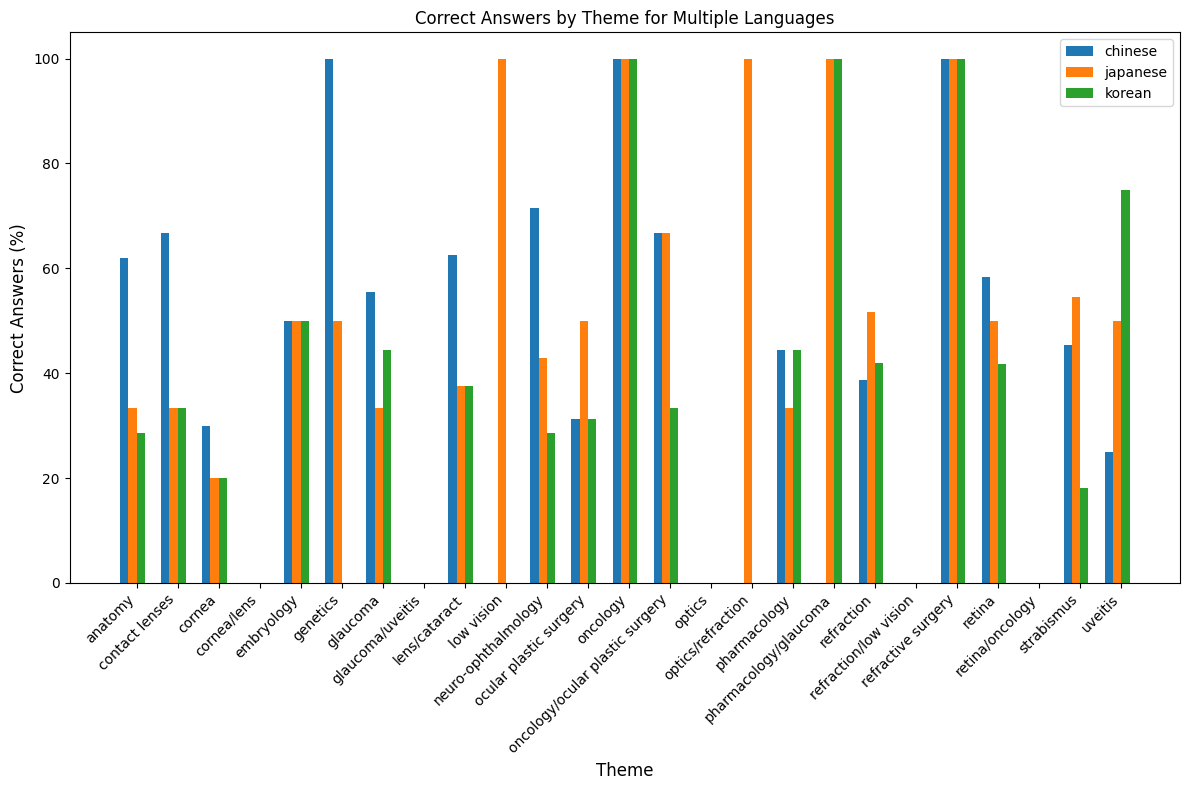

     theme  match_chinese  match_japanese  match_korean  Total  \
0  anatomy             13               7             6     21   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                 61.904762                  33.333333   

   korean_ratio_percentage  
0                28.571429  


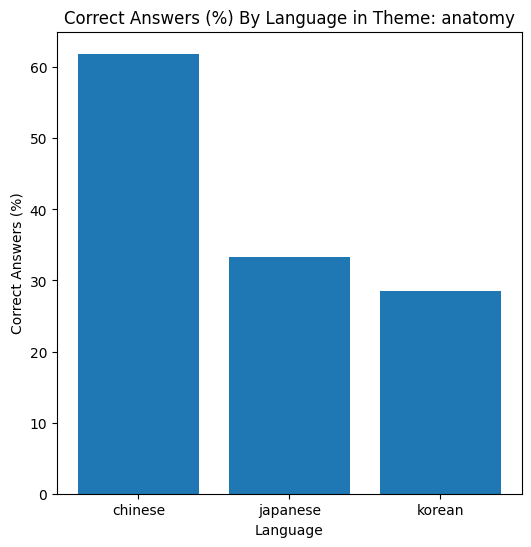

    theme  match_chinese  match_japanese  match_korean  Total  \
0  cornea              3               2             2     10   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                      30.0                       20.0   

   korean_ratio_percentage  
0                     20.0  


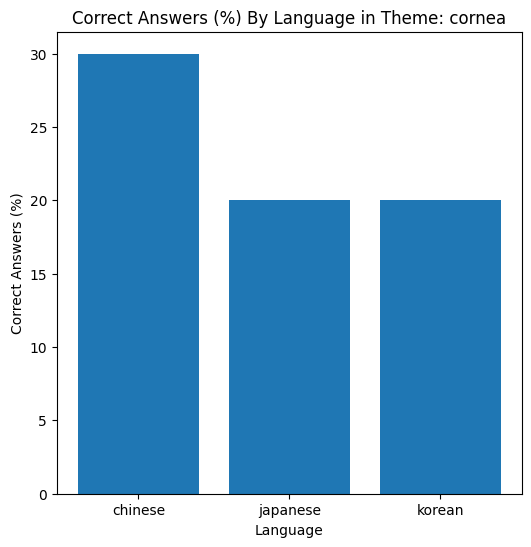

        theme  match_chinese  match_japanese  match_korean  Total  \
0  embryology              1               1             1      2   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                      50.0                       50.0   

   korean_ratio_percentage  
0                     50.0  


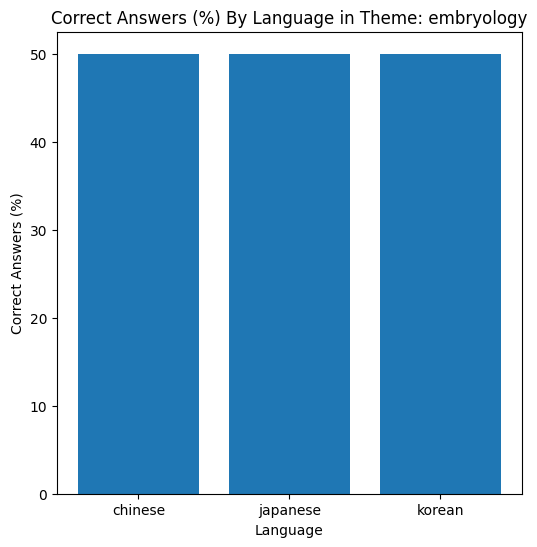

      theme  match_chinese  match_japanese  match_korean  Total  \
0  genetics              2               1             0      2   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                     100.0                       50.0   

   korean_ratio_percentage  
0                      0.0  


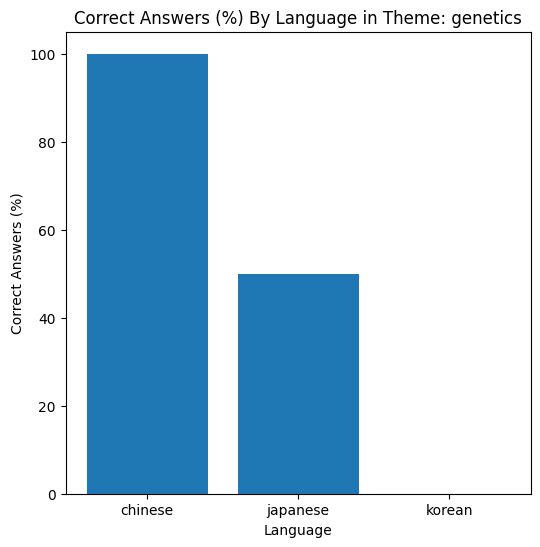

      theme  match_chinese  match_japanese  match_korean  Total  \
0  glaucoma              5               3             4      9   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                 55.555556                  33.333333   

   korean_ratio_percentage  
0                44.444444  


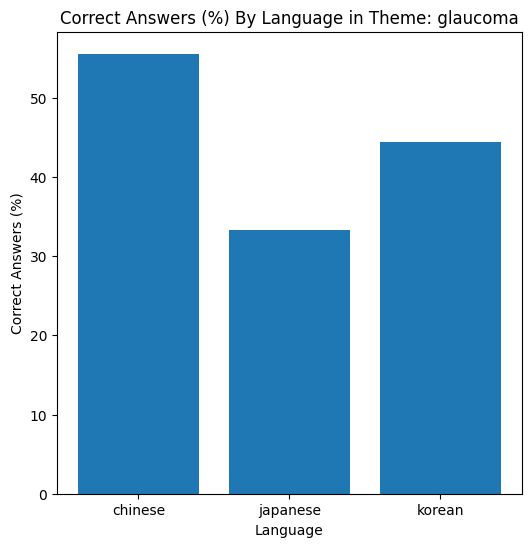

      theme  match_chinese  match_japanese  match_korean  Total  \
0  oncology              1               1             1      1   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                     100.0                      100.0   

   korean_ratio_percentage  
0                    100.0  


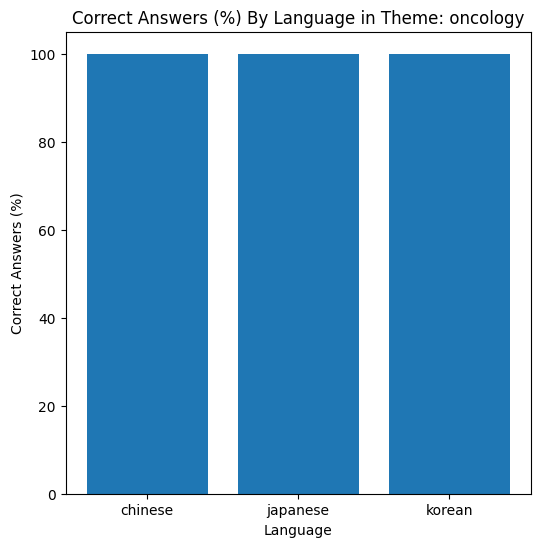

          theme  match_chinese  match_japanese  match_korean  Total  \
0  pharmacology              4               3             4      9   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                 44.444444                  33.333333   

   korean_ratio_percentage  
0                44.444444  


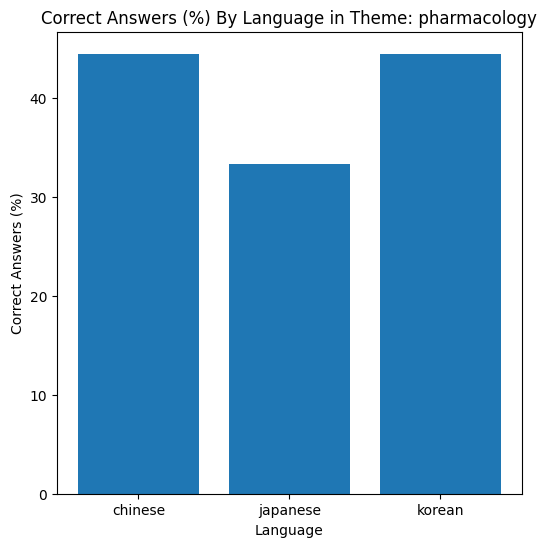

        theme  match_chinese  match_japanese  match_korean  Total  \
0  refraction             12              16            13     31   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                 38.709677                  51.612903   

   korean_ratio_percentage  
0                41.935484  


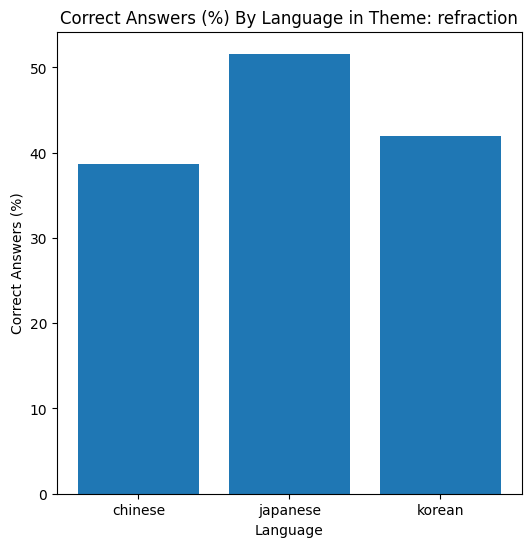

    theme  match_chinese  match_japanese  match_korean  Total  \
0  retina              7               6             5     12   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                 58.333333                       50.0   

   korean_ratio_percentage  
0                41.666667  


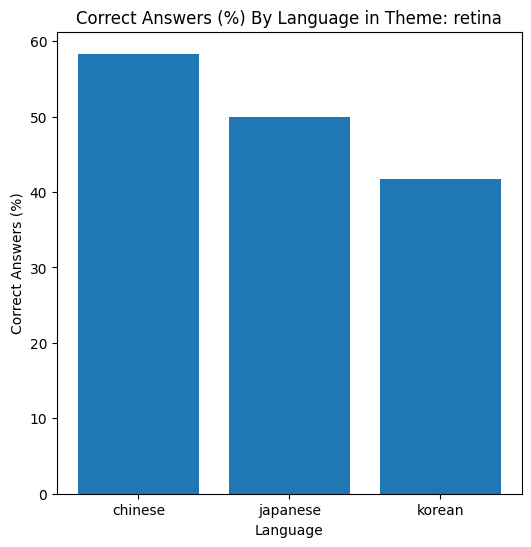

            theme  match_chinese  match_japanese  match_korean  Total  \
0  contact lenses              2               1             1      3   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                 66.666667                  33.333333   

   korean_ratio_percentage  
0                33.333333  


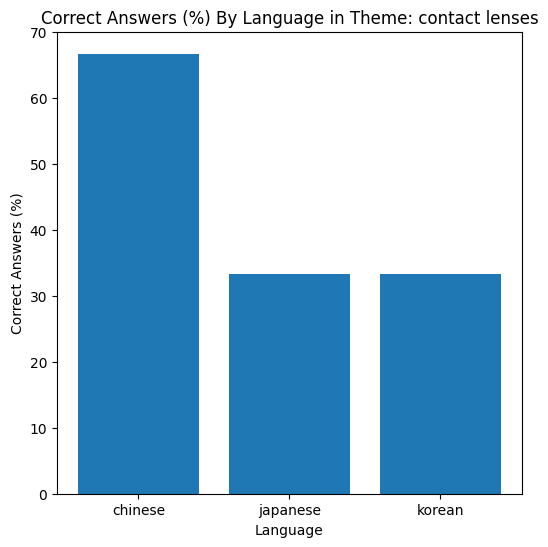

    theme  match_chinese  match_japanese  match_korean  Total  \
0  cornea              3               2             2     10   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                      30.0                       20.0   

   korean_ratio_percentage  
0                     20.0  


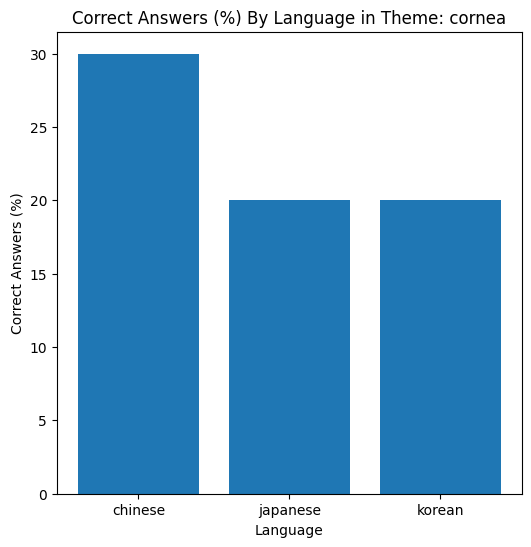

         theme  match_chinese  match_japanese  match_korean  Total  \
0  cornea/lens              0               0             0      1   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                       0.0                        0.0   

   korean_ratio_percentage  
0                      0.0  


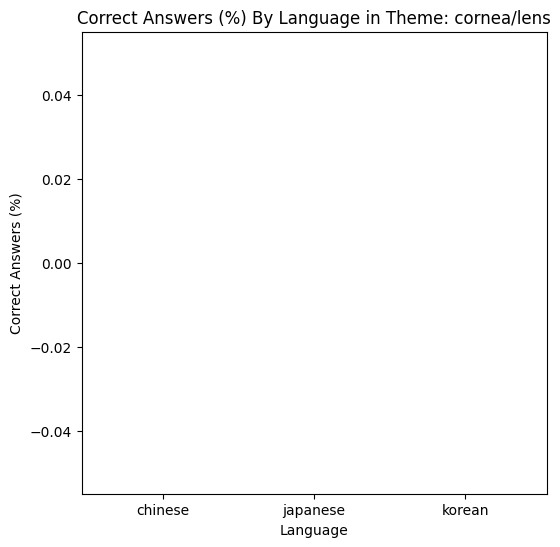

      theme  match_chinese  match_japanese  match_korean  Total  \
0  glaucoma              5               3             4      9   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                 55.555556                  33.333333   

   korean_ratio_percentage  
0                44.444444  


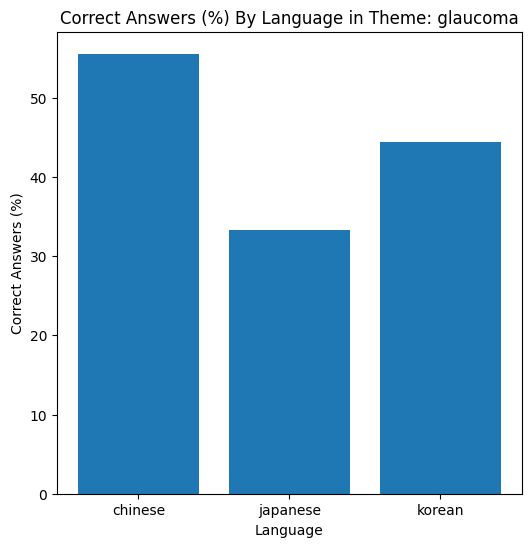

              theme  match_chinese  match_japanese  match_korean  Total  \
0  glaucoma/uveitis              0               0             0      1   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                       0.0                        0.0   

   korean_ratio_percentage  
0                      0.0  


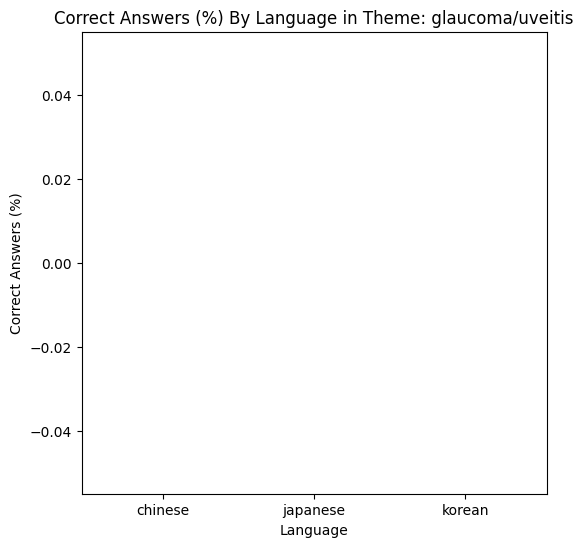

           theme  match_chinese  match_japanese  match_korean  Total  \
0  lens/cataract              5               3             3      8   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                      62.5                       37.5   

   korean_ratio_percentage  
0                     37.5  


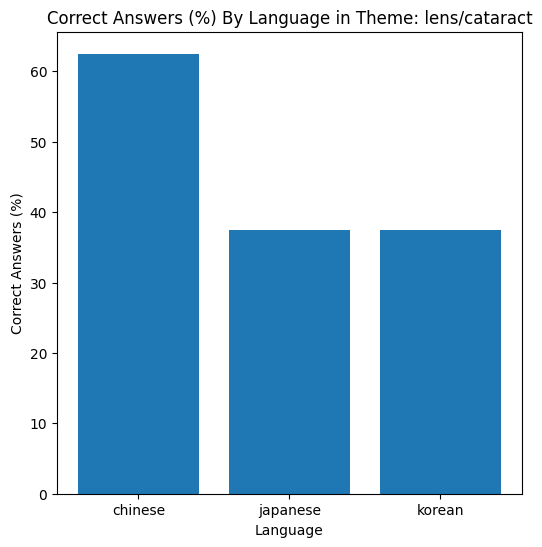

        theme  match_chinese  match_japanese  match_korean  Total  \
0  low vision              0               1             0      1   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                       0.0                      100.0   

   korean_ratio_percentage  
0                      0.0  


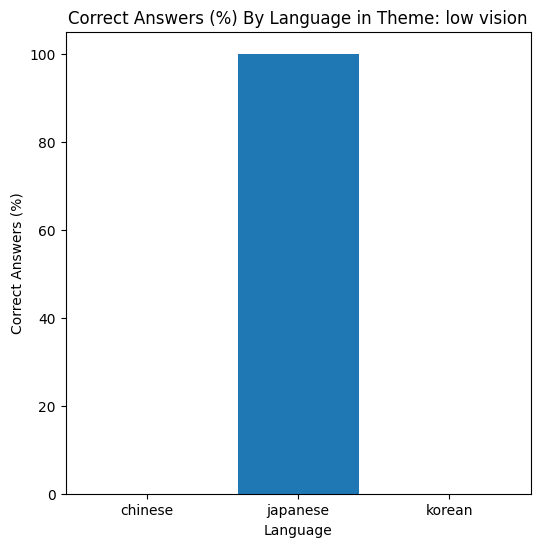

                 theme  match_chinese  match_japanese  match_korean  Total  \
0  neuro-ophthalmology              5               3             2      7   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                 71.428571                  42.857143   

   korean_ratio_percentage  
0                28.571429  


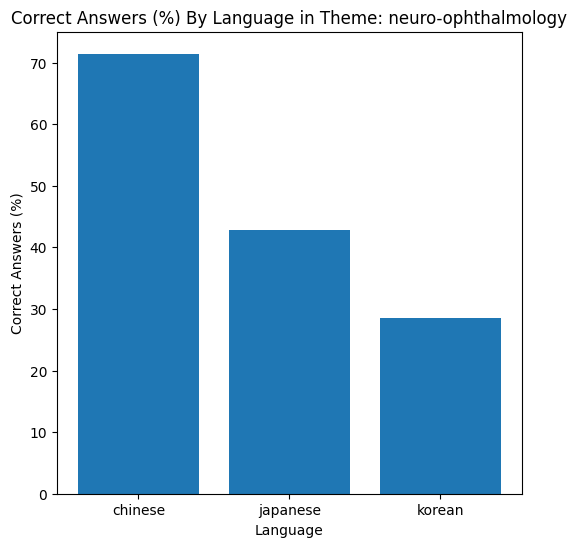

                    theme  match_chinese  match_japanese  match_korean  Total  \
0  ocular plastic surgery              5               8             5     16   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                     31.25                       50.0   

   korean_ratio_percentage  
0                    31.25  


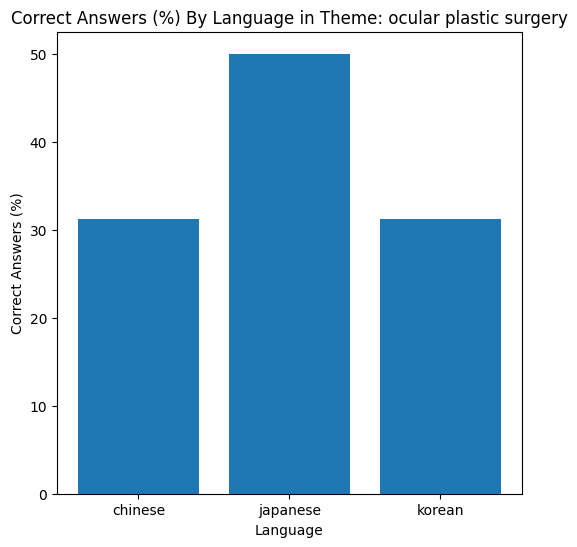

                             theme  match_chinese  match_japanese  \
0  oncology/ocular plastic surgery              2               2   

   match_korean  Total  chinese_ratio_percentage  japanese_ratio_percentage  \
0             1      3                 66.666667                  66.666667   

   korean_ratio_percentage  
0                33.333333  


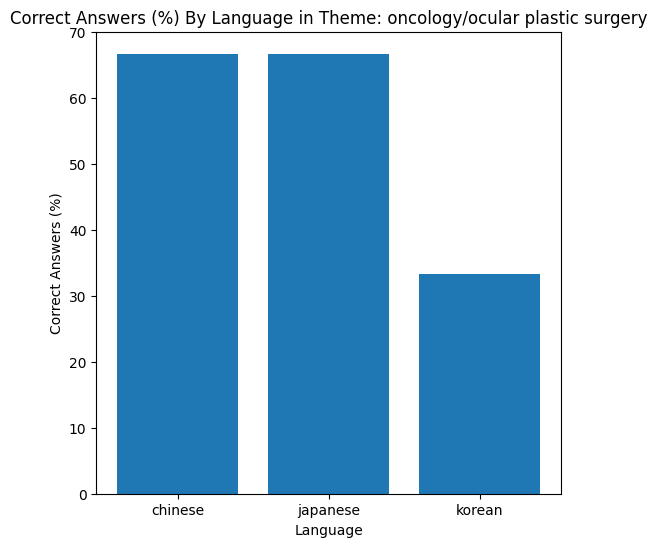

    theme  match_chinese  match_japanese  match_korean  Total  \
0  optics              0               0             0      1   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                       0.0                        0.0   

   korean_ratio_percentage  
0                      0.0  


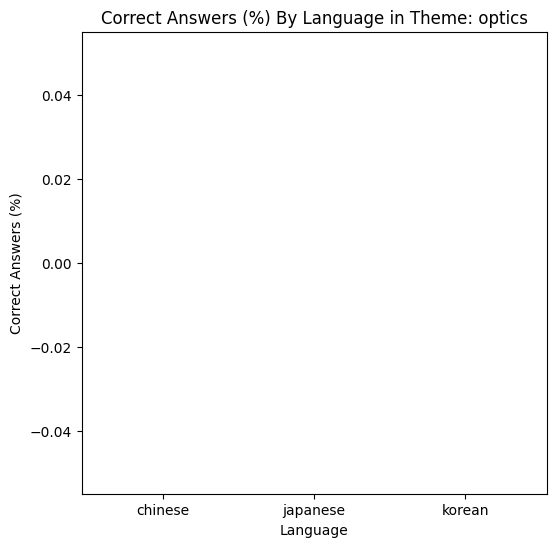

               theme  match_chinese  match_japanese  match_korean  Total  \
0  optics/refraction              0               1             0      1   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                       0.0                      100.0   

   korean_ratio_percentage  
0                      0.0  


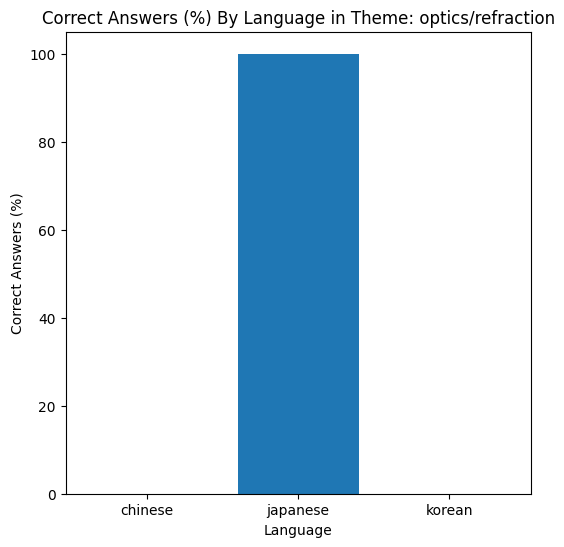

          theme  match_chinese  match_japanese  match_korean  Total  \
0  pharmacology              4               3             4      9   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                 44.444444                  33.333333   

   korean_ratio_percentage  
0                44.444444  


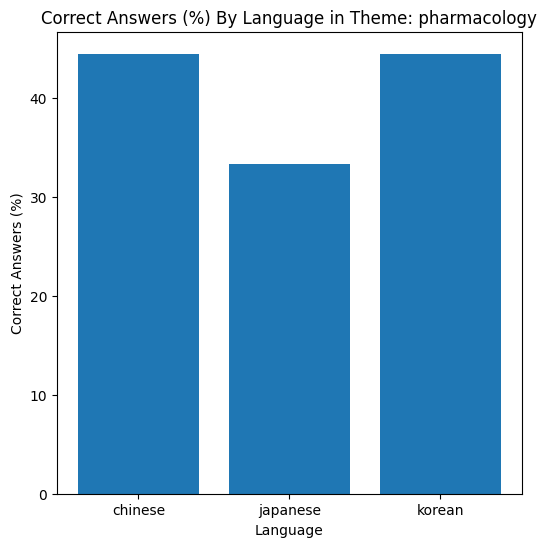

                   theme  match_chinese  match_japanese  match_korean  Total  \
0  pharmacology/glaucoma              0               1             1      1   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                       0.0                      100.0   

   korean_ratio_percentage  
0                    100.0  


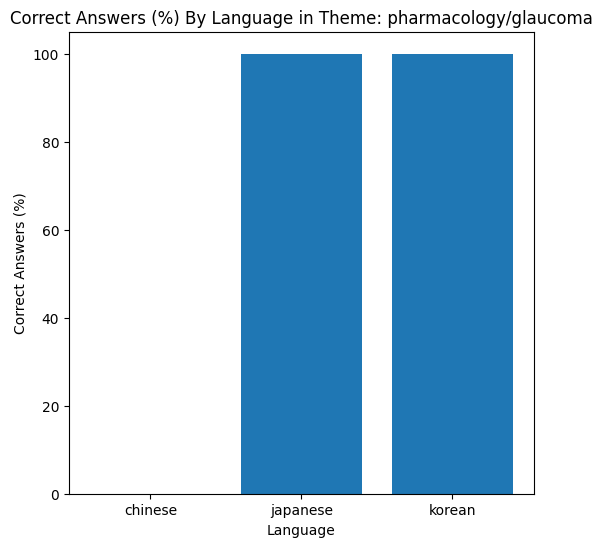

        theme  match_chinese  match_japanese  match_korean  Total  \
0  refraction             12              16            13     31   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                 38.709677                  51.612903   

   korean_ratio_percentage  
0                41.935484  


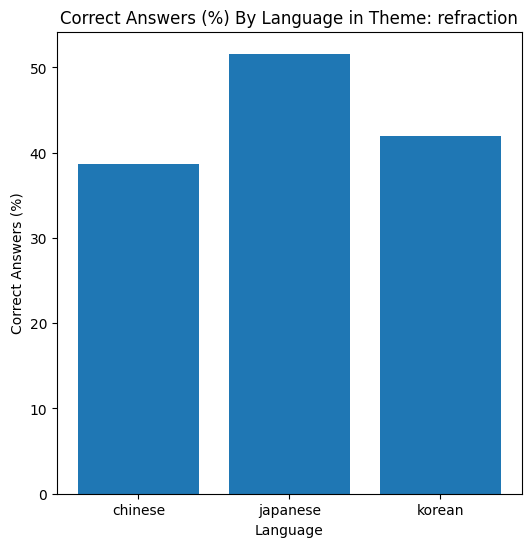

                   theme  match_chinese  match_japanese  match_korean  Total  \
0  refraction/low vision              0               0             0      2   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                       0.0                        0.0   

   korean_ratio_percentage  
0                      0.0  


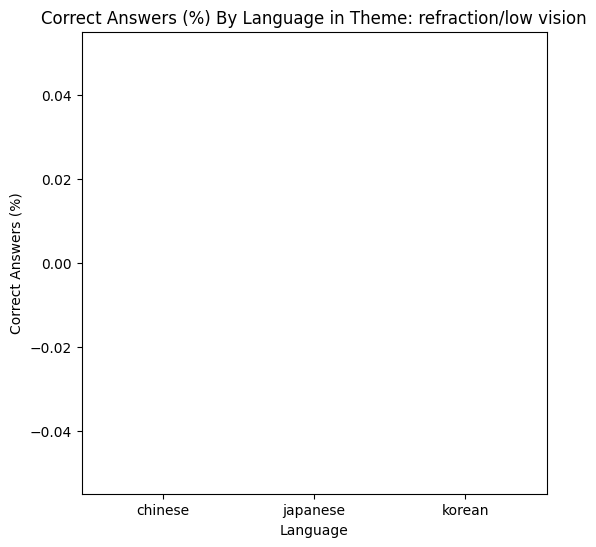

                theme  match_chinese  match_japanese  match_korean  Total  \
0  refractive surgery              2               2             2      2   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                     100.0                      100.0   

   korean_ratio_percentage  
0                    100.0  


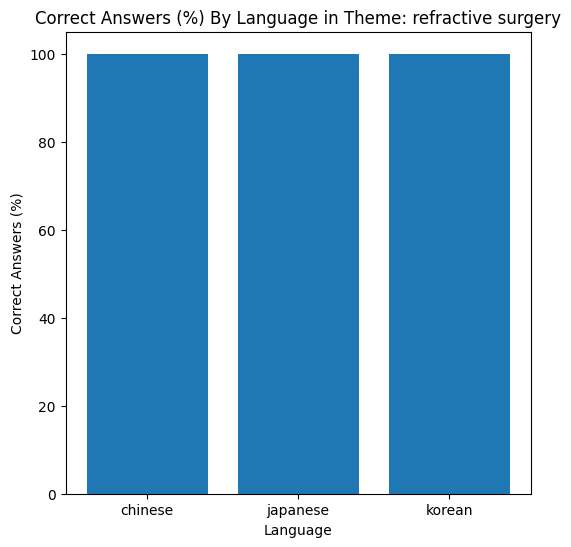

    theme  match_chinese  match_japanese  match_korean  Total  \
0  retina              7               6             5     12   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                 58.333333                       50.0   

   korean_ratio_percentage  
0                41.666667  


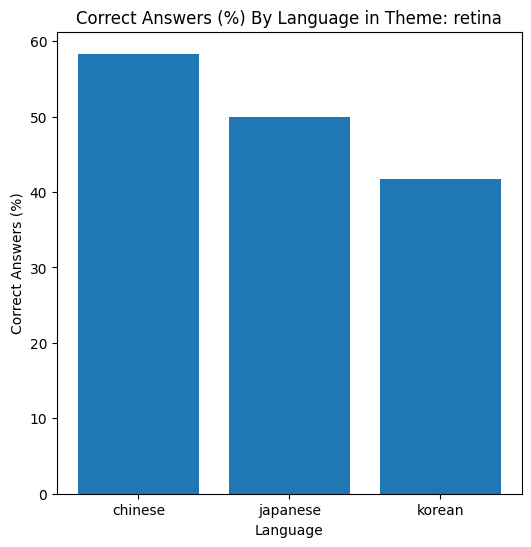

             theme  match_chinese  match_japanese  match_korean  Total  \
0  retina/oncology              0               0             0      1   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                       0.0                        0.0   

   korean_ratio_percentage  
0                      0.0  


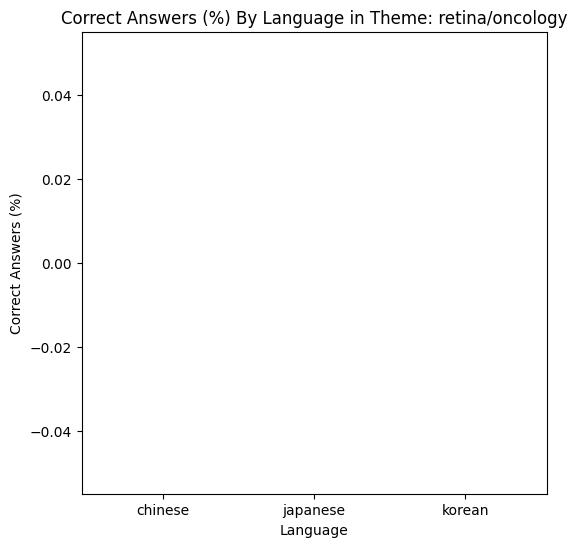

        theme  match_chinese  match_japanese  match_korean  Total  \
0  strabismus              5               6             2     11   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                 45.454545                  54.545455   

   korean_ratio_percentage  
0                18.181818  


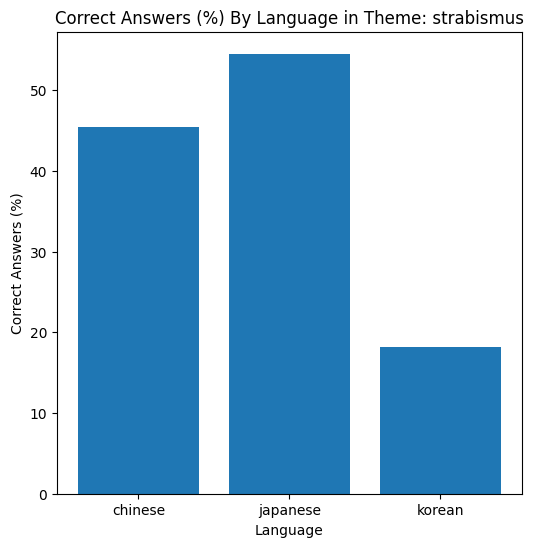

     theme  match_chinese  match_japanese  match_korean  Total  \
0  uveitis              2               4             6      8   

   chinese_ratio_percentage  japanese_ratio_percentage  \
0                      25.0                       50.0   

   korean_ratio_percentage  
0                     75.0  


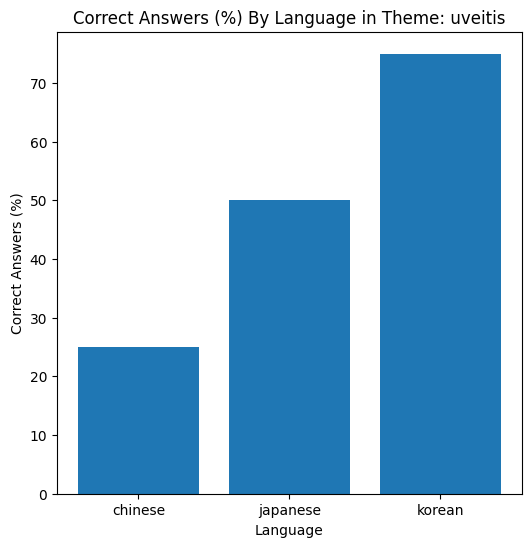

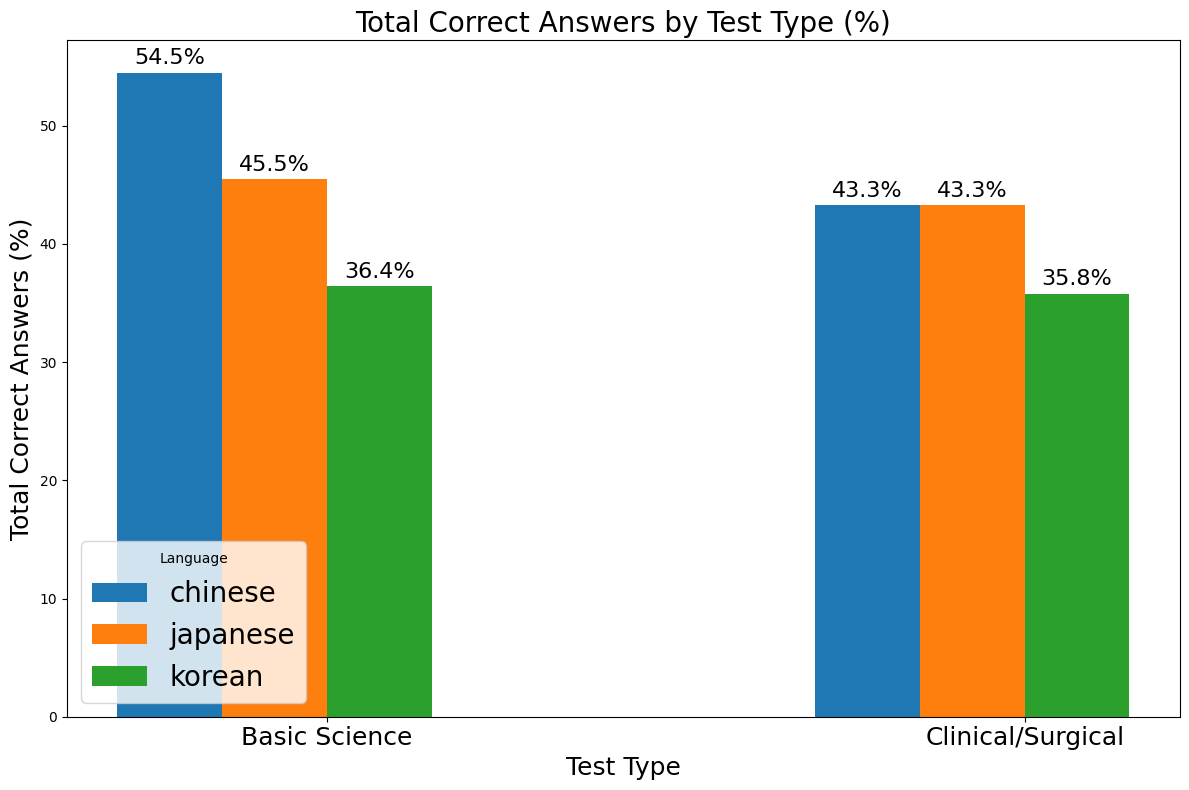

In [5]:
TEMPERATURE = str(TEMPERATURE).replace('.', '_')

run_analysis(model=MODEL, temperature=TEMPERATURE, n_repetitions=N_REPETITIONS, languages=LANGUAGES)

In [6]:
N_REPETITIONS = 1 if N_REPETITIONS < 1 else N_REPETITIONS
pd.read_csv(f'results/results_{MODEL}_Temperature{TEMPERATURE}_Repetitions{N_REPETITIONS}/matches_results_{MODEL}.csv')

,test,year,theme,match_chinese,match_japanese,match_korean,Total
0,Teórica I,2022,anatomy,13,7,6,21
1,Teórica I,2022,cornea,1,1,0,1
2,Teórica I,2022,embryology,1,1,1,2
3,Teórica I,2022,genetics,2,1,0,2
4,Teórica I,2022,glaucoma,1,1,1,1
5,Teórica I,2022,oncology,1,1,1,1
6,Teórica I,2022,pharmacology,1,1,1,3
7,Teórica I,2022,refraction,3,6,5,12
8,Teórica I,2022,retina,1,1,1,1
9,Teórica II,2022,contact lenses,2,1,1,3


In [7]:
pd.read_csv(f'results/results_{MODEL}_Temperature{TEMPERATURE}_Repetitions{N_REPETITIONS}/matches_results_{MODEL}.csv').sum()

test              Teórica ITeórica ITeórica ITeórica ITeórica IT...
year                                                          60660
theme             anatomycorneaembryologygeneticsglaucomaoncolog...
match_chinese                                                    76
match_japanese                                                   72
match_korean                                                     59
Total                                                           164
dtype: object